In [1]:
import matplotlib.pyplot as plt
plt.ion()
import numpy as np
import cartopy 
import cartopy.crs as ccrs
import pandas as pd
import os
import sys

In [7]:
#imported excel file in pandas
cots_file='COTS Bipinnaria Salinity & Food Tolerance_ENVI5809–COTS Project.xlsx'
CotsData=pd.read_excel(cots_file, sheet_name='Bip_Salinty & Food', header=0, names=None, index_col='Ref #')
CotsData

,ID,Hours of Exposure,Salinity Treatment,Food Treatment (3 levels),Replicate #,Starting n,Normal Morphology,Total Clones,Mortality,Survival,Normal Morphology (%),Clone (%),Mortality (%),Survival (%),Total (%)
Ref #,,,,,,,,,,,,,,,
1,1,24,34,NF,1,10,10,0,0,10,100,0,0,100,100
2,2,24,34,NF,2,10,9,0,1,9,90,0,10,90,100
3,3,24,34,NF,3,10,10,0,0,10,100,0,0,100,100
4,4,24,34,NF,4,10,10,0,0,10,100,0,0,100,100
5,5,24,34,NF,5,10,10,0,0,10,100,0,0,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,71,168,17,LF,4,10,0,0,10,0,0,0,100,0,100
289,72,168,17,HF,1,10,0,0,10,0,0,0,100,0,100
290,73,168,17,HF,2,10,0,0,10,0,0,0,100,0,100


In [8]:
#removed unwanted columns 
CotsDataNew=CotsData.drop(columns=['ID','Replicate #','Starting n','Normal Morphology','Total Clones','Mortality','Normal Morphology (%)','Clone (%)','Mortality (%)','Survival','Total (%)'])
CotsDataNew

,Hours of Exposure,Salinity Treatment,Food Treatment (3 levels),Survival (%)
Ref #,,,,
1,24,34,NF,100
2,24,34,NF,90
3,24,34,NF,100
4,24,34,NF,100
5,24,34,NF,100
...,...,...,...,...
288,168,17,LF,0
289,168,17,HF,0
290,168,17,HF,0


In [9]:
#Renamed columns 
dict={"Hours of Exposure":"Exposure Period (Hours)", "Salinity Treatment":"Salinity Level (‰)", "Food Treatment (3 levels) ":"Food Levels","Survival (%)":"Survival Rate"}
CotsPlots=CotsDataNew.rename(columns=dict)
CotsPlots

,Exposure Period (Hours),Salinity Level (‰),Food Levels,Survival Rate
Ref #,,,,
1,24,34,NF,100
2,24,34,NF,90
3,24,34,NF,100
4,24,34,NF,100
5,24,34,NF,100
...,...,...,...,...
288,168,17,LF,0
289,168,17,HF,0
290,168,17,HF,0


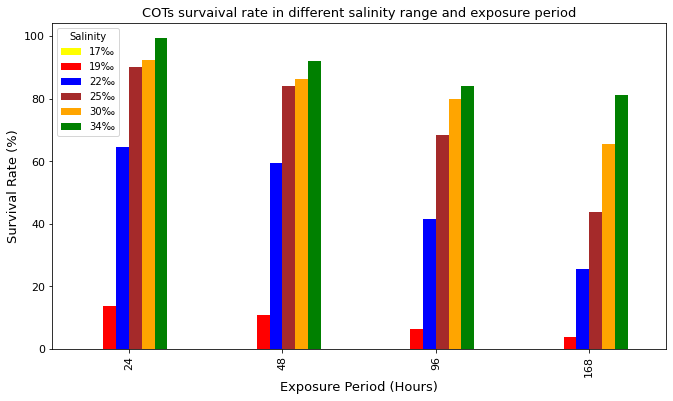

In [10]:
BarPlot=CotsPlots.pivot_table(index='Exposure Period (Hours)', columns='Salinity Level (‰)',
                      values='Survival Rate', aggfunc='mean').plot(kind='bar', figsize=(11, 6),
                      color=['yellow', 'red', 'blue', 'brown', 'orange', 'green'])

plt.xlabel('Exposure Period (Hours)',fontsize=13)
plt.ylabel('Survival Rate (%)',fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('COTs survaival rate in different salinity range and exposure period',fontsize=13)
plt.legend(loc='upper left',title='Salinity')
BarPlot.legend(["17‰","19‰","22‰","25‰","30‰","34‰"],title='Salinity')

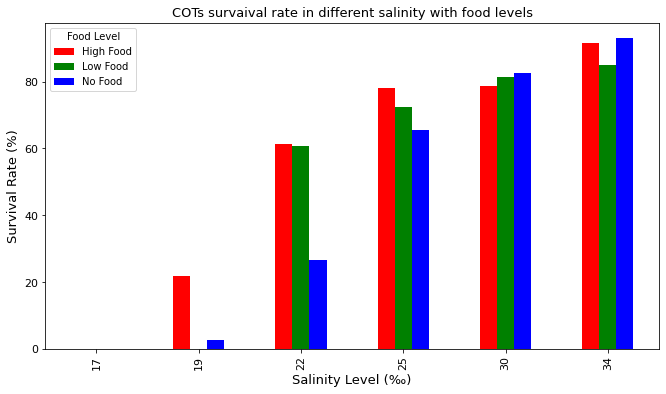

In [12]:
BarPlot=CotsPlots.pivot_table(index='Salinity Level (‰)', columns='Food Levels',
                      values='Survival Rate', aggfunc='mean').plot(kind='bar', figsize=(11, 6),
                      color=['red', 'green', 'blue'])

plt.xlabel('Salinity Level (‰)',fontsize=13)
plt.ylabel('Survival Rate (%)',fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('COTs survaival rate in different salinity with food levels',fontsize=13)
plt.legend(loc='upper left')
BarPlot.legend(["High Food","Low Food","No Food"],title='Food Level')

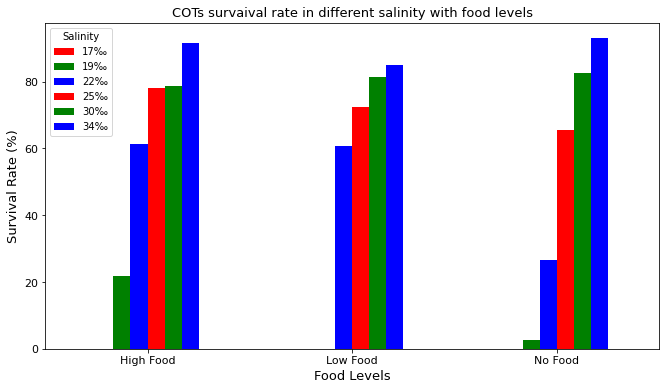

In [11]:
BarPlot=CotsPlots.pivot_table(index='Food Levels', columns='Salinity Level (‰)',
                      values='Survival Rate', aggfunc='mean').plot(kind='bar', figsize=(11, 6),
                      color=['red', 'green', 'blue'])

plt.xlabel('Food Levels',fontsize=13)
plt.ylabel('Survival Rate (%)',fontsize=13)
plt.xticks(fontsize=11,rotation=0)
BarPlot.set_xticklabels(['High Food','Low Food','No Food'])
plt.yticks(fontsize=11)
plt.title('COTs survaival rate in different salinity with food levels',fontsize=13)
plt.legend(loc='upper left')
BarPlot.legend(["17‰","19‰","22‰","25‰","30‰","34‰"],title='Salinity')